<a href="https://colab.research.google.com/github/5harad/API-201-2023/blob/main/lecture/grammar-data-analysis-answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **API-201: The grammar of data analysis**

In this class session, we'll see how we can accomplish sophisticated data analysis by cleverly combining just a few basic operations. To do so, we'll use the R library `tidyverse`

**Getting started**

Before you start, create a copy of this Jupyter notebook in your own Google Drive by clicking `Copy to Drive` in the menubar. If you do not do this your work will not be saved!

We recommend completing this problem set in Google Chrome.

Run the cell below to set some formatting options that will make it easier for us to explore and analyze data.

In [ ]:
# Some initial setup
options(digits = 3, repr.matrix.max.rows = 10, repr.matrix.max.cols = 100)

In this section, and throughout most of the course, we will be using packages that are part of the [`tidyverse`](https://www.tidyverse.org/).

The [tidyverse](https://www.tidyverse.org) is a collection of actively developed `R` packages that follow a certain principle of writing code.
Here, we will primarily focus on the part of `tidyverse` which deals with data manipulation.

Run the cell below to import the `tidyverse` library.

In [ ]:
# First, we load the library
library(tidyverse)

### The data

First, we will start by reading some data.
There are many functions for reading various data formats into the `R` environment as a table of data (or, `data.frame`).
For example, either `read_csv` (from `tidyverse`) or `read.csv` (base `R`) can be used to read a `csv` file (e.g., a file where each line represents a row in the table, and the columns are separated by a `,`).

For this course, we have prepared a table of data in the `rds` format, a format that `R` uses to efficiently store data.
We can read the `sqf_sample.rds` file into the current `R` session with the `readRDS` function.
Let's name this table `stop_df`.

The loaded data frame, `stop_df`, is a sample of stops in NYC, recorded on a
[UF-250 form][uf250_link]. (We consider a random sample of 1M stops out of a total of 3.8M in the full dataset.)

Each row corresponds to a stop that an officer made, and the columns represent various entries in the [UF-250 form][uf250_link].

[uf250_link]: https://www.prisonlegalnews.org/media/publications/Blank%20UF-250%20Form%20-%20Stop%2C%20Question%20and%20Frisk%20Report%20Worksheet%2C%20NYPD%2C%202016.pdf

In [ ]:
# Read the data
fname <- "https://5harad.com/datasets/API201/sqf_sample.rds"
stop_df <- readRDS(url(fname))

To start getting a sense of data, we can look at the first few rows with the `head` function.

In [ ]:
head(stop_df)

Below is a list of columns in the data, roughly corresponding to the [UF-250 form][uf250_link]:

* Base information regarding stop:
    * `id`, `serial`, `year`, `date`, `day`, `time`, `hour`, `precinct`, `location_housing`,
      `suspected_crime`, `lat`, `lon`, `xcoord`, `ycoord`

* Circumstances which led to the stop:
    * `stopped_bc_object`, `stopped_bc_desc`, `stopped_bc_casing`, `stopped_bc_lookout`, `stopped_bc_clothing`, `stopped_bc_drugs`, `stopped_bc_furtive`, `stopped_bc_violent`, `stopped_bc_bulge`, `stopped_bc_other`
    
* Demographics of the stopped individual:
    * `subject_dob`, `subject_id_type`, `subject_sex`, `subject_race`,
      `subject_hispanic`, `subject_age`, `subject_height`, `subject_weight`,
      `subject_hair`, `subject_eye`, `subject_build`

* Whether physical force was used:
    * `force_hands`, `force_wall`, `force_ground`, `force_drawn`,
      `force_pointed`, `force_baton`, `force_handcuffs`,
      `force_pepper`, `force_other`

* Was suspect arrested?: `arrested`
    * if yes: `arrested_reason`

* Was summons issued?: `summons_issued`

* Officer in uniform?: `officer_uniform`, `officer_verbal`, `officer_shield`

* Was person frisked?: `frisked`
    * if yes: `frisked_bc_suspected_crime`, `frisked_bc_weapons`, `frisked_bc_attire`, `frisked_bc_actual_crime`, `frisked_bc_noncompliance`, `frisked_bc_threats`, `frisked_bc_prior`, `frisked_bc_furtive`, `frisked_bc_bulge`

* Was person searched?: `searched`,
    * if yes: `searched_hardobject`, `searched_outline`,
      `searched_admission`, `searched_other`

* Was weapon found?: `found_weapon`
    * if yes: `found_gun`, `found_pistol`, `found_rifle`, `found_assault`,
      `found_knife`, `found_machinegun`, `found_other`
      
* Was other contraband found?: `found_contraband`

* Additional circumstances/factors
    * `additional_report`, `additional_investigation`, `additional_proximity`,
      `additional_evasive`, `additional_associating`, `additional_direction`,
      `additional_highcrime`, `additional_time`, `additional_sights`,
      `additional_other`

* Additional reports prepared: `extra_reports`

* Whether the stop was a result of a radio run: `radio_run`

* Was the stop made inside or outside: `inside_outside`

* Period of observation (minutes): `observation_period`, `stop_length`

* Type of ID the person had (photo, refused, verified, other): `identification`

* Local hit rate: `local_hit_rate`, defined as the average hit rate for drug and cpw stops at the location of the stop for the previous year, using gaussian kernel averaging. NA if it's other type of stops.

[uf250_link]: https://www.prisonlegalnews.org/media/publications/Blank%20UF-250%20Form%20-%20Stop%2C%20Question%20and%20Frisk%20Report%20Worksheet%2C%20NYPD%2C%202016.pdf
      

## Introduction to `tidyverse` verbs

In the world of `tidyverse`, a _verb_ is a function that

* takes a data frame as its first argument, and
* returns another data frame as a result

Any function that meets this criterion, even if it's not necessarily a function in the `tidyverse` package, can be considered a _verb_.

For example, the `head()` function that we used above, if applied to a data frame, will return the first few rows of that data frame. In this sense, the `head()` function is a _verb_.

The **core idea** of `tidyverse` is that a vast majority of data manipulation needs can be satisfied through a combination of five verbs and a preposition.

We can think of this paradigm as the **grammar of data manipulation**.  

verb                 | action
-------------------- | ---------
`filter(df, ...)`    | select a subset of _rows_ by some specified condition
`select(df, ...)`    | select a subset of _columns_
`mutate(df, ...)`    | create a _new column_ (often as a function of existing columns)
`arrange(df, ...)`   | reorder (sort) _rows_ according to values of specific _columns_
`summarize(df, ...)` | aggregate and reduce a vector (column) to a single value

<br>
   
preposition                 | action
-------------------- | ---------
`group_by(df, ...)`    | prepare the data so that verbs can be applied to each group



We will explore each of these verbs (and some additional variations within each category) below.

### `filter` (1/5)

The `filter(df, ...)` verb is used to select a subset of _rows_ that satisfy the conditions specified in `...`.
The conditions must be written in a form that would evaluate to either `TRUE` or `FALSE`.

For example, the cell below returns a data frame of stops in precinct `22`.

In [ ]:
filter(stop_df, precinct == 22)

In the `filter` command above, we used the `==` sign to specify that we wanted rows for which the precinct numbers were exactly equal to 22. We could analogously use the symbols `>`, `>=`, `<`, and `<=` to specify precincts greater than, greater than or equal to, less than, and less than or equal to some number.

Because the output has a lot of rows — too many to print — `R` only displays the first few and the last few, with `...` indicating the omitted rows.

Importantly, applying a verb to a data frame **does not alter** the original data frame. This is generally a very good design choice (in computer science we call this the no-side-effects principle). So if you want to save the output, you have to explicitly assign it to a variable.

Multiple conditions can also be specified in the `filter` function.

For example, the cell below returns a data frame of stops in precinct `22` in which a weapon was found.

In [ ]:
filter(stop_df, precinct == 22, found_weapon == TRUE)

# Note that we could also write
#   filter(stop_df, precinct == 22, found_weapon)
# since the values of found_weapon are already either TRUE or FALSE

By default, `filter()` will combine multiple conditions as `AND` operations.
In the example above, we are returned stops where `precinct == 22` _**AND**_ `found_weapon == TRUE`.

We can specify an `OR` condition by using the `|` operator.

For example, the cell below return stops in precinct `22` where either a weapon _**OR**_ contraband was found.

In [ ]:
filter(stop_df,
       precinct == 22,
       found_weapon == TRUE | found_contraband == TRUE)

# Note that, within a set of parentheses, you can have as many line breaks as you want.
# It's generally easier to read (and modify) if you have each condition on a new line.
# For example, if you quickly wanted to check what the result looks like for _all_ precincts,
# in the above code, you could just "comment out" the precinct == 22 condition by adding a "#" at the begining of the line

We can use the `%in%` operator to filter to values that match a collection of values.

For example, the cell below return stops in which the suspected crime was `burglary`, `robbery`, or `grand larceny`.

In [ ]:
filter(stop_df,
       suspected_crime %in% c("burglary", "robbery", "grand larceny"))

### Exercise: `filter()`

Find all stops that took place in `transit`(`location_housing` is `transit`), where the `suspected_crime` was criminal possession of a weapon (`cpw`), and a weapon was _not_ found (`found_weapon` is `FALSE`).

In [ ]:
# Your answer here!

# START solution
filter(stop_df,
       location_housing == "transit",
       suspected_crime == "cpw",
       found_weapon == FALSE)
# END solution

### `select` (2/5)

Use `select(df, ...)` to limit a data frame to the specified columns.

In [ ]:
select(stop_df, year, precinct, suspected_crime)

`tidyverse` also provides some useful helper functions to `select` columns that match specific criteria. For example, `starts_with(x)` lets us select columns that start with the string `x`.

For example, the cell below returns all the columns indicating what was found.

In [ ]:
select(stop_df, starts_with("found_"))

### Exercise: `select()`

1. Based on the UF-250 form, select the columns from `stop_df` that describe the demographics of the stopped individual.

In [ ]:
# Your answer here!

# START solution
select(stop_df, starts_with("subject_"))
# END solution

### `mutate` (3/5)

Use `mutate(df, ...)` to create new columns, usually as a function of existing columns.

Suppose we wish to create a column called `is_cpw`, indicating whether the `suspected_crime` for each stop was `cpw` (criminal possession of a weapon) or not.
We would write,

In [ ]:
mutate(stop_df, is_cpw = (suspected_crime == "cpw"))
# Note that the new column will be the very last column in the data frame

### Exercise: `mutate()`

Create a column called `is_am` that indicates whether the stop occurred in the morning (prior to 12) or not. The values of the column should be either `TRUE` or `FALSE`.

In [ ]:
# Your answer here!

# START solution
mutate(stop_df, is_am = (hour < 12))
# END solution

### `arrange` (4/5)

Use `arrange(df, ...)` to reorder the rows of a data frame by the value of specified columns.
Multiple conditions are arranged from left to right.

In [ ]:
arrange(stop_df, date, time)

Note that the `NA`s in the column denote missing values, and appear at the end of sorted tables.

### Exercise: `arrange()`

Order `stop_df` in _descending_ order by precinct, with the precincts with the largest numbers appearing first in the list.

Hint: To sort by `col_name` in descending order, you can write `desc(col_name)` in `arrange`.

In [ ]:
# Your answer here!

# START solution
arrange(stop_df, desc(precinct))
# END solution

### `summarize` (5/5)

Use `summarize(df, ...)` to aggregate multiple rows into a single row. Unlike `mutate()`, functions that are used in `summarize()` must return a single value (i.e., "aggregate" the provided vector)

For example, to find the `mean` height of all stopped individuals, we can run the cell below.

In [ ]:
summarize(stop_df, avg_height = mean(subject_height))

`tidyverse` also provides a special function `n()` which returns the number of rows within the input to a verb.

For example, to count how many stops (rows) there are in total, we can run the following cell.

In [ ]:
summarize(stop_df, N = n())

### Exercise: `summarize()`

Find the proportion of stops that resulted in the recovery of a weapon. Is the proportion larger or smaller than you expected?



In [ ]:
# Your answer here!

# START solution
summarize(stop_df, num_weapons = sum(found_weapon)/n())
# END solution

### Grouping (Split-apply-combine)

Now that we've covered the five core verbs, we should be able to manipulate data to our heart's desire, yes?

Then, how about computing the number of stops for each `subject_race`?


A natural, but _**tedious**_ way to compute this would look something like this:

In [ ]:
# NOTE: Code in this cell is intended to be an example of a BAD way to compute
# this. This is purely for illustrative purposes, and should NEVER EVER be
# re-used, in any context. Never.
white_stops <- filter(stop_df, subject_race == "white")
black_stops <- filter(stop_df, subject_race == "black")
hispanic_stops <- filter(stop_df, subject_race == "hispanic")

N_white <- summarize(white_stops, N = n())
N_black <- summarize(black_stops, N = n())
N_hispanic <- summarize(hispanic_stops, N = n())

N_white
N_black
N_hispanic

This style of code can easily get out of hand!
For example, what happens if we get a new dataset that includes 8 different race categories?

As horrible as the above code is, it is useful for highlighting a common pattern that emerges when manipulating data:

1. **Split**: The data are split into smaller pieces of data, according to one (or more) column(s).
   In this case, we've split the data by the `subject_race` column.
1. **Apply**: Some operation is applied to each of the smaller pieces.
   In this case, we've simply counted the number of rows of each piece using `summarize()` and `n()`.
1. **Combine**: The results of the previous **apply** are combined to some final data structure.
   In the above case, for simplicity, we've just printed the individual numbers; but we usually want to keep everything in the form of a data frame.

This pattern in data manipulation is so common, that there is a `tidyverse` function for it: `group_by`.

On it's own, `group_by` makes no visible changes to a data frame, other than marking the data frame as being "grouped".
The difference is only made apparent when we apply some other verb to a grouped data frame.

Remember that the `tidyverse` functions don't change the original data frame (this is good thing!). So, for now, we need to save the "grouped" data as a new variable for our changes to have an effect (but we'll see a more convenient approach to this later).

In [ ]:
stops_by_race <- group_by(stop_df, subject_race)

# Note that the two data frames, on the surface, seem identical.
stop_df
stops_by_race

In [ ]:
# But we can see a difference when applying, for example, a summarize
summarize(stop_df, N = n())

In [ ]:
summarize(stops_by_race, N = n())

As shown in the simple example above, when a `tidyverse` verb is applied to a "grouped" data frame,
`tidyverse` internally **splits**, **applies**, and **combines** the data, finally returning results for
_each of the unique values that are found in the columns by which the data frame is grouped_.

This can be a lot to process!
But once you get used to it (via trying a bunch of manipulation tasks and seeing some more examples), you'll find it extremely convenient and powerful.

### Exercise: `group_by()`

Calculate the proportion of stopped people who are frisked (`frisked`) and arrested (`arrested`) for each race group.

In [ ]:
# Your answer here!

# START solution
race_group <- group_by(stop_df, subject_race)
summarize(race_group,
          frisk_rate = mean(frisked),
          arrest_rate = mean(arrested)
         )
# END solution

### Multiple (chained) operations

As we saw above, we would often like to apply multiple operations (verbs) to a data frame.
However, by design, verbs do not save intermediate changes to the original data frame, so for each operation we would have to assign the result to a new data frame.

Even for a reasonable number of operations, this can get quite messy (i.e., we'd end up with so many names and data frames that we only use as intermediate steps).

Fortunately, there's a better way!

The `%>%` symbol — called the _pipe_ operator — lets us chain operations together without saving the intermediate results. It works by taking the output of one verb and using that as the starting point of the next.

For example, the code below is a more succint way to compute the proportion of people in each race group who are frisked and arrested.

In [ ]:
stop_df %>%
    group_by(subject_race) %>%
    summarize(
      frisk_rate = mean(frisked),
      arrest_rate = mean(arrested)
    )

Note the intentional style of: (1) starting from the data frame (instead of a verb that explicitly includes the data frame); and (2) keeping each verb on its own line.
This not only makes it easier to read, but also easier to maintain and modify.

We can also group by multiple categories, as in the following example where we compute frisk and arrest rates for each precinct and race group.

In [ ]:
stop_df %>%
    group_by(precinct, subject_race) %>%
    summarize(
      frisk_rate = mean(frisked),
      arrest_rate = mean(arrested)
    )

### Exercise: Putting it all together

Create a data frame called `hit_rates` that contains three columns:
  - `precinct`
  - `subject_race`
  - `hit_rate` (i.e., the proportion of stops that resulted in the recovery of a weapon).

When creating the data frame, limit to stops in which:
  - the suspected crime (`suspected_crime`) was criminal possession of a weapon (`cpw`), and
  - the race of the stopped individual (`subject_race`) was White (`white`), Black (`black`), or Hispanic (`hispanic`).



In [ ]:
# Your answer here!

# START solution
hit_rates <- stop_df %>%
  filter(suspected_crime == 'cpw', subject_race %in% c('white','black','hispanic')) %>%
  group_by(precinct, subject_race) %>%
  summarize(
    hit_rate = mean(found_weapon)
  )
hit_rates
# END

Run the code below to plot your results.

How do you interpret the results? What does the plot tell you about discrimination in stop-and-frisk?

In [ ]:
hit_rates %>%
  pivot_wider(names_from = subject_race, values_from = hit_rate) %>%
  pivot_longer(c(black, hispanic), names_to = "race", values_to = "hit_rate") %>%
  mutate(race = str_to_title(race)) %>%
  ggplot(aes(x=hit_rate, y=white)) +
  geom_point() +
  facet_grid(.~race) +
  scale_x_continuous('Hit rate for people of color', limits=c(0,0.3)) +
  scale_y_continuous('Hit rate for White individuals', limits=c(0,0.3)) +
  geom_abline(slope=1, intercept=0, linetype='dashed')

### Joining datasets

Often we need to combine multiple datasets to carry out an analysis. We can do this with various types of `join` operations (e.g., an `inner_join`, `left_join`, and a `full_join`). You can read more about the differences between these in [R4DS](https://r4ds.hadley.nz/joins#how-do-joins-work).

For a final exercise, we'll compute the _stop rate_ (i.e., the number of stops divided by the number of residents) for each precinct in New York City.

To do so, we'll use 2010 precinct-level population data [compiled by John Keefe](https://johnkeefe.net/nyc-police-precinct-and-census-data). To help you visualize the geography of NYC, here is a map with each police precinct labeled (from [Golub et al., 2006](https://www.researchgate.net/figure/fig1_247923137)).

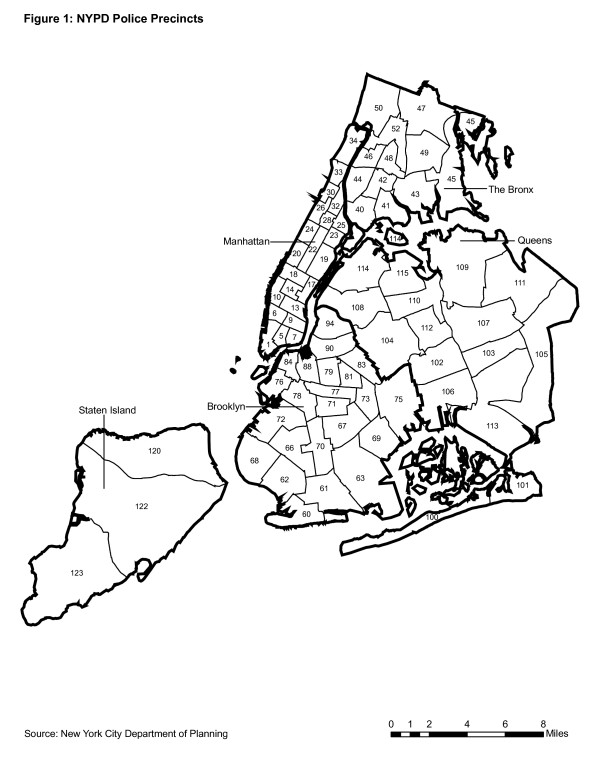

Run the cell below to load the precinct-level population data.

In [ ]:
# load the precinct-level population data
fname <- "https://5harad.com/datasets/API201/nyc_precinct_pop.csv"
precinct_pop <- read_csv(fname, col_types = cols(precinct = col_factor()))

head(precinct_pop)

### Exercise: Stop rates

Compute the stop rate for each precinct, and order the results in decreasing order of stop rate. Your final data frame should have four columns: `precinct`, `num_stops`, `population`, and `stop_rate`.

What patterns do you observe? Do you think stop rate computed in this way is a good measure of police activity? What are some limitations of this measure?

Hint: Remember that you can use `n()` within `summarize` to count the number of observations in a group.

In [ ]:
# Your answer here!

# START solution
stop_df %>%
  group_by(precinct) %>%
  summarize(num_stops = n()) %>%
  left_join(precinct_pop, by = 'precinct') %>%
  mutate(stop_rate = num_stops / population) %>%
  arrange(desc(stop_rate))
# END

## End notes

There are many, MANY more verbs that we simply did not have the time to cover here, but are immensely useful.
Some examples are:

* `rename(df, ...)`: rename columns
* `slice(df, ...)`: select rows of a data frame by index, instead of some condition
* `top_n(df, N, col)`: retrieve the top N rows for values in some specified column

One great resource for learning about `tidyverse` and using it to work with data is Hadley Wickham's online book: [R for Data Science](https://r4ds.had.co.nz/).
(Hadley Wickham is also the original author for many of the packages in `tidyverse`.)